# Analyzing gene variants associated with longevity

## Introduction
Welcome to my first bioinformatics project: **Analyzing gene variant associated with longevity**. In this project, we will be working with a dataset on significant genetic variants using MySQL and Python to gain insights into the gene variants associated with longevity. The first task of the project will be carried out in MySQL, and the other two tasks in Python.

### Objectives
1. Data cleaning using SQL
    - Association: filter the genetic variants where the association is marked as 'significant'.
    - Multiple populations: include only those genetic variants that have been studied in at least two different populations.
2. Exploratory data analysis
    - Data cleaning.
    - Calculcate the number of significant genetic variants for each population.
    - Create a barplot with Seaborn to illustrate the findings.
4. Correlation analysis
    - Calculate the correlation between the number of significant genetic variants and the number of unique genes per population.
    - Create a scatter plot with Seaborn to visualize the relationship.

#### 1. Data cleaning

Data cleaning was performed in MySQL to select only the signficant variants that have been studied in at least two populations.

In [ ]:
SELECT DISTINCT l1.*
FROM longevity l1
JOIN longevity l2
ON l1.gene = l2.gene
AND l1.population <> l2.population
WHERE l1.association = 'significant'
ORDER BY l1.id;

#### 2. Exploratory data analysis

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Extract the data from the CSV file
df = pd.read_csv('D:/Programming/pydir/Apps/tutorial/longevity/longevity_filtered.csv')

In [13]:
df.head()

,id,association,population,variant,gene,pubMed
0,4,significant,Finnish,APOC3,APOC3,8018664
1,5,significant,Finnish,E2/E3/E4,APOE,8018664
2,6,significant,French,I/D,ACE,8136829
3,8,significant,Finnish,APOB,APOB,8155090
4,9,significant,Finnish,E2/E3/E4,APOE,8155090


In [21]:
# Explore the dataset
# df.describe()
# df.dtypes
# df.info()
df['association'].unique()

array(['significant'], dtype=object)

In [ ]:
# Check for missing data
print("Missing Data:\n", df.isna().sum())

In [7]:
# Replace the missing data of the variant column with 'Unknown'
df['variant'] = df['variant'].fillna('Unknown')

In [65]:
# Calculate the number of significant variants for each population
variant_counts = df.groupby("population")["variant"].count().reset_index()
variant_counts.columns = ["population", "count"]
variant_counts.sort_values(by="count", ascending=False, inplace=True)
top_ten_variants = variant_counts.head(n=10)
top_ten_variants

,population,count
24,Italian,18
12,Danish,13
0,American (Caucasian),11
29,Italian (Southern),7
19,Finnish,7
20,French,6
31,Japanese,6
17,European,6
3,Ashkenazi Jewish,4
9,Chinese (Uighur in Xinjiang),3


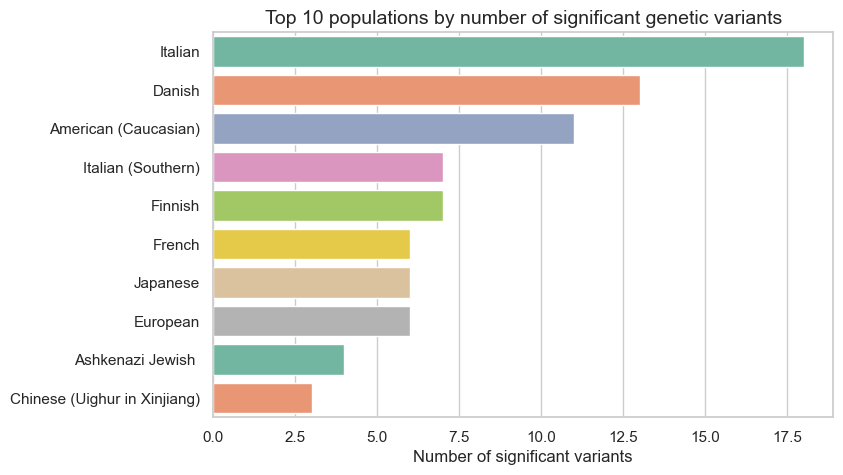

In [55]:
# Create the horizontal bar chart for the top 5 populations
plt.figure(figsize=(8, 5))
bar_chart = sns.barplot(
    data=top_ten_variants,
    y="population",
    x="count",
    hue = 'population',
    palette="Set2"
)

# Add labels and title
plt.title("Top 10 populations by number of significant genetic variants", fontsize=14)
plt.xlabel("Number of significant variants", fontsize=12)
plt.ylabel("")
plt.show()

#### 3. Correlation analysis

In [57]:
# calculate the number of unique variants for each population
unique_variants = df.groupby("population")["variant"].nunique().reset_index()
unique_variants.columns = ["population", "unique_variants"]
unique_variants.head()

,population,unique_variants
0,American (Caucasian),11
1,American (Georgia and Louisiana populations fr...,1
2,"American, English, Irish",1
3,Ashkenazi Jewish,4
4,Ashkenazi Jewish (Jerusalem),1


In [58]:
# merge with the variant_counts dataframe
variant_counts = pd.merge(variant_counts, unique_variants, on="population")
variant_counts.head()

,population,count,unique_variants
0,Italian,18,15
1,Danish,13,12
2,American (Caucasian),11,11
3,Italian (Southern),7,7
4,Finnish,7,5


In [60]:
# Calculate the correlation coefficient between the number of significant variants and the number of unique genes using NumPy
correlation = np.corrcoef(variant_counts["count"], variant_counts["unique_variants"])[0, 1]
print("Correlation coefficient between the number of significant variants and the number of unique genes:", round(correlation, 2))

Correlation coefficient between the number of significant variants and the number of unique genes: 0.98


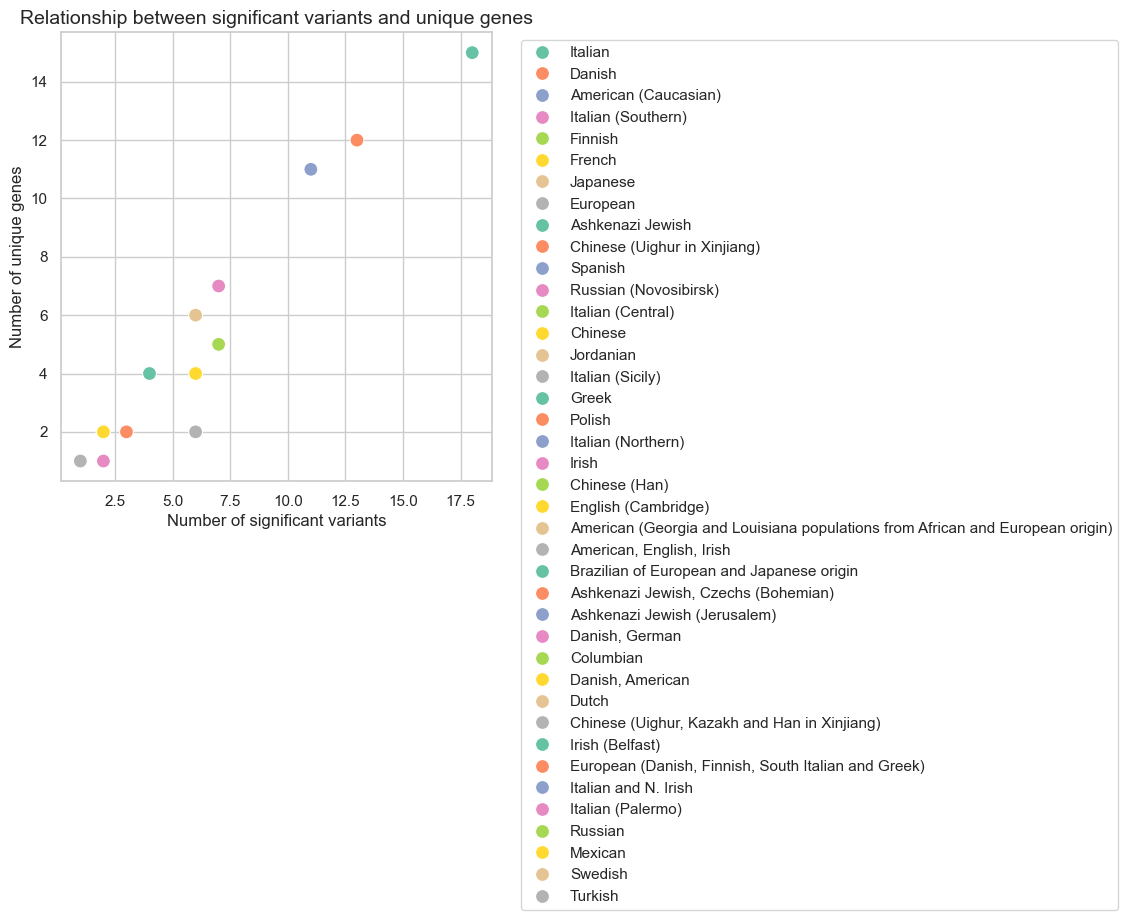

In [63]:
# Create a scatter plot with Seaborn to display the relationship between the number of significant variants and the number of unique genes per population
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=variant_counts,
    x="count",
    y="unique_variants",
    s=100,
    hue="population",
    palette="Set2"
)

# Add labels and title
plt.title("Relationship between significant variants and unique genes", fontsize=14)
plt.xlabel("Number of significant variants", fontsize=12)
plt.ylabel("Number of unique genes", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2)
plt.show()



#### Summary of Results: Analysis of Significant Genetic Variants
In this analysis, we explored the dataset of significant genetic variants, focusing on population trends and the relationship between genetic variants and genes. Here are the key findings:

- **Top five populations by significant variants:**
    1. Italian: 18
    2. Danish: 13
    3. American (Caucasian): 11
    4. Italian (Southern): 7
    5. Finnish: 7

- **Strong gene-variant association:**
A correlation coefficient of 0.98 between the number of significant variants and the number of unique genes indicates a positive relationship. 

- **Visualization:**
Results were visualized using a bar chart and scatter plot to showcase population trends and the association between significant variants and unique genes.